# 1. PyTorch 패키지의 기본 구성

## torch
> 메인 네임스페이스다.  
텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조를 가진다.

## torch.autograd
> 자동 미분을 위한 함수들이 포함되어 있다.  
자동 미분의 on/off를 제어하는 컨텍스트 매니저(enable_grad/no_grad)나  
자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 `Function` 등이 포함되어 있다.

## torch.nn
> 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어 있다.  
예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있다.

## torch.optim
> 확률적 경사 하강법(SGD; Storchastic Gradient Descent)을 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있다.

## torch.utils.data
> SGD의 반복 연산을 실행할 때 사용하는 mini-batch용 유틸리티 함수가 포함되어 있다.

## torch.onnx
> ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용한다.   
ONNX는 서로 다른 딥러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷이다.

# 2. Tensor Manipulation 1

## Numpy와 동일하게 동작

In [1]:
import numpy as np

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print(f'Rank of t: {t.ndim}')
print(f'Shape of t: {t.shape}')

Rank of t: 1
Shape of t: (7,)


In [4]:
print(f't[0] t[1], t[-1] = {t[0], t[1], t[-1]}')

t[0] t[1], t[-1] = (0.0, 1.0, 6.0)


In [5]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [6]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


In [7]:
import torch

In [14]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.]) # torch.FloatTensor = torch.tensor
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [9]:
print(t.dim())
print(t.shape)
print(t.size())

1
torch.Size([7])
torch.Size([7])


In [10]:
t = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.],
                  [7., 8., 9.],
                  [10., 11., 12.]
                ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


## Broadcasting 기능

In [15]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [16]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 3]])
print(m1 + m2)

tensor([[5., 6.]])


In [17]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [19]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [24]:
'''
[1, 2]
==> [[1, 2],
     [1, 2]]
[3]
[4]
==> [[3, 3],
     [4, 4]]

'''

'\n[1, 2]\n==> [[1, 2],\n     [1, 2]]\n[3]\n[4]\n==> [[3, 3],\n     [4, 4]]\n\n'

## 행렬 곱셈 / matmul()

In [22]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


## Element-wise product (Hamadard product) / mul(), *

In [23]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [25]:
'''
[1]
[2]
==> [[1, 1],
     [2, 2]]
'''

'\n[1]\n[2]\n==> [[1, 1],\n     [2, 2]]\n'

## 평균 (Mean)

In [26]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [27]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)


In [28]:
print(t.mean(dim=0))

tensor([2., 3.])


In [ ]:
'''
dim 옵션에 mean을 계산할 때 사용할 차원 기준을 결정한다.
0일 때 제일 큰 차원의 것들을 기준으로 계산한다.
'''

In [41]:
tt = torch.arange(1, 28, 1, dtype=torch.float).reshape(3, 3, 3)
print(tt)
print(tt.mean(dim=0))
print(tt.mean(dim=1))
print(tt.mean(dim=2))

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]],

        [[19., 20., 21.],
         [22., 23., 24.],
         [25., 26., 27.]]])
tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])
tensor([[ 4.,  5.,  6.],
        [13., 14., 15.],
        [22., 23., 24.]])
tensor([[ 2.,  5.,  8.],
        [11., 14., 17.],
        [20., 23., 26.]])


In [ ]:
'''
3*3*3 행렬에서,
dim=0인 경우,
제일 큰 차원의 요소들끼리의 mean을 낸다.
mean의 (0, 0, 0)의 값은 0번째 차원(shape의 0번째)을 기준으로, 즉 각 차원의 (0, 0)의 값들을 모아 계산하고,
(0, 0, 0)값인 1과
(0, 1, 0)의 값인 10과 
(0, 2, 0)의 값인 19의 평균

dim=1인 경우,
mean의 (0, 0, 0)의 값은 1번째 차원(shape의 1번째)을 기준으로, 즉 각 차원의 (0, )의 값들을 모아 계산하고,
(0, :, 0)값인 1, 4, 7의 평균

dim=2인 경우,
mean의 (0, 0, 0)의 값은 2번째 차원(shape의 2번째)을 기준으로,
(0, 0, :)값인 1, 2, 3의 평균
'''

## 덧셈 (Sum)

In [43]:
tt = torch.arange(1, 28, 1, dtype=torch.float).reshape(3, 3, 3)
print(tt)
print(tt.sum(dim=0))
print(tt.sum(dim=1))
print(tt.sum(dim=2))

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]],

        [[19., 20., 21.],
         [22., 23., 24.],
         [25., 26., 27.]]])
tensor([[30., 33., 36.],
        [39., 42., 45.],
        [48., 51., 54.]])
tensor([[12., 15., 18.],
        [39., 42., 45.],
        [66., 69., 72.]])
tensor([[ 6., 15., 24.],
        [33., 42., 51.],
        [60., 69., 78.]])


## Max와 ArgMax

> Max는 텐서 내의 최대값을,  
ArgMax는 텐서 내의 최대값의 위치를 반환한다.

In [44]:
tt = torch.arange(1, 28, 1, dtype=torch.float).reshape(3, 3, 3)
print(tt)
print(tt.max())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]],

        [[19., 20., 21.],
         [22., 23., 24.],
         [25., 26., 27.]]])
tensor(27.)


In [47]:
print(tt.max(dim=0)) # 0번째 차원을 기준으로 max 값 구하기

torch.return_types.max(
values=tensor([[19., 20., 21.],
        [22., 23., 24.],
        [25., 26., 27.]]),
indices=tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]))


In [46]:
print(tt.max(dim=0)[0])
print(tt.max(dim=0)[1])

tensor([[19., 20., 21.],
        [22., 23., 24.],
        [25., 26., 27.]])
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])


# 3. Tensor Manipulation 2

## 텐서 크기 변환

> view() 와 reshape()이 있는데, reshape()을 쓰는게 나아보임

In [48]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [50]:
print(ft.view([-1, 3])) # ft 텐서를 (?, 3) 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


## Squeeze

> 차원 내의 요소들이 하나만 있는 경우 그 차원을 없앤다.

In [51]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


## Unsqueeze

> 특정 위치에 요소가 하나인 차원을 추가한다.

In [52]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])


## Type Casting

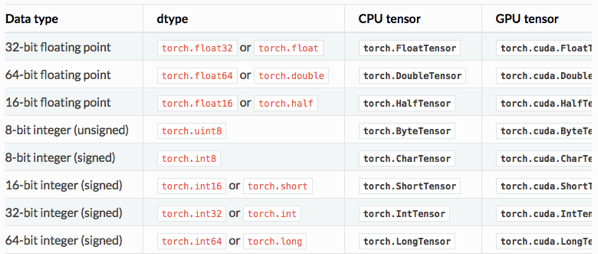

In [53]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print(lt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])


In [54]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate

In [56]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [57]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [59]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [60]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [61]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [62]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)) # 2차원으로 만들고 쌓기

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [66]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


## ones_like, zeros_like

In [67]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [68]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [69]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])
